# Jarný  CyberSecurityDay 2023

## Workshop č. 2: Klasifikácia malvéru pomocou neurónových sietí
- Klasifikácia malvéru pomáha analytikovi pochopiť správanie škodlivých súborov.
- V rámci workshopu sa pozrieme na spôsoby, ako získať ohodnotený dataset.
- Ukážeme viaceré možnosti vizuálnej reprezentácie a návrhy modelov neorónových sietí pre tento klasifikačný problém.

### Úprava súboru do vizuálnej formy

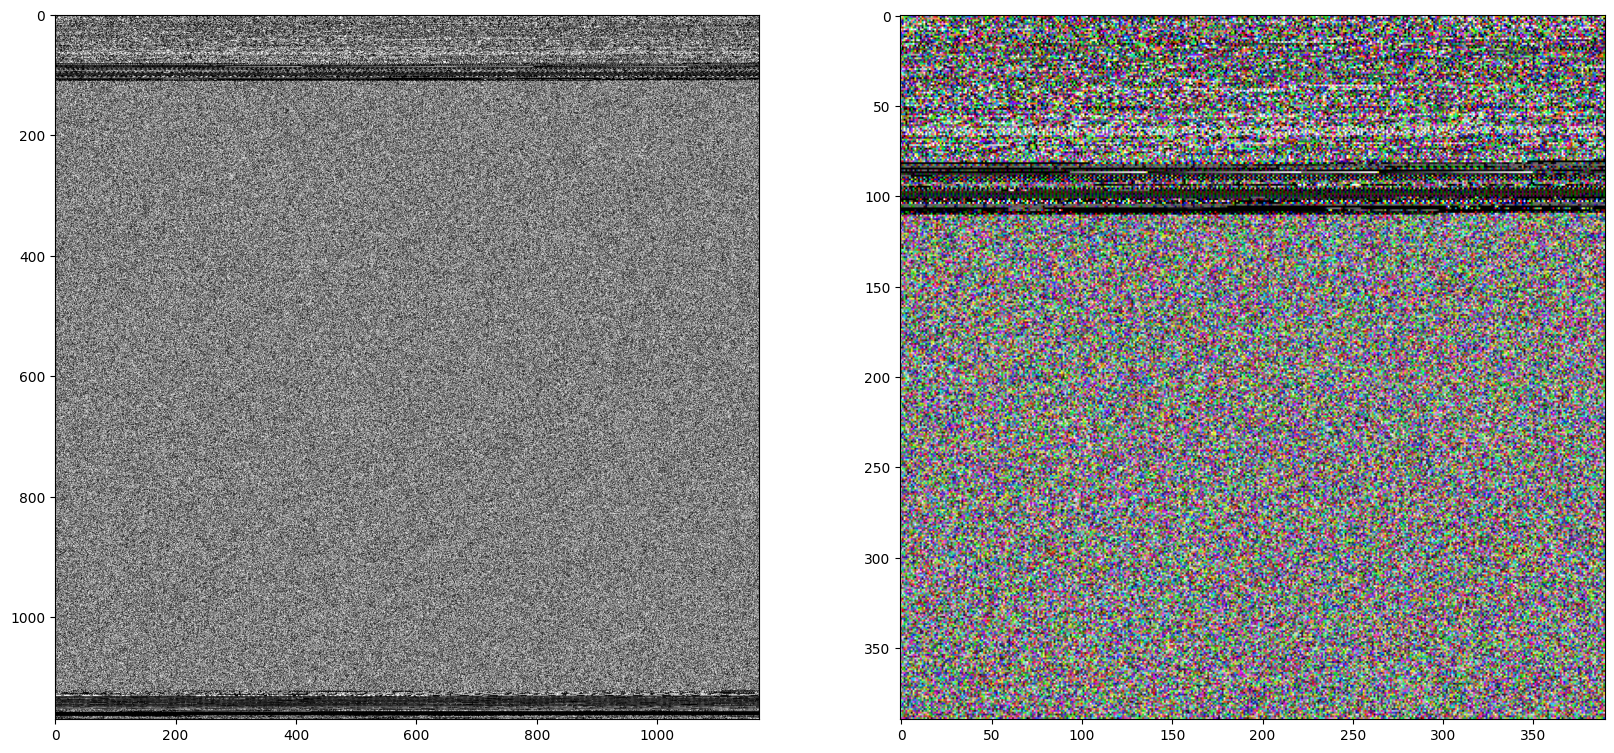

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math
import os

# Zistíme veľkosť súboru, vypočítame odmocninu pre vytvorenie štorcového obrázka
size = os.path.getsize('./ChromeSetup.exe')
square = math.sqrt(size)
square = round(square)
with open('./ChromeSetup.exe', mode='rb') as f:

    # načítanie súboru do poľa
    from_file = np.fromfile(f, dtype=np.uint8, count=size)

    # reshape for greyscale
    # ak je veľkosť súboru mänšia ako odmocnina na druhú, potrebujeme pridať prázdne dáta nakoniec
    if len(from_file) < square**2:
        from_file = np.append(from_file, np.zeros(square**2 - size, dtype=np.uint8))
    greyscale = from_file[:square**2]
    d1 = greyscale.reshape(square, square)

    # reshape for rgb
    # ak je veľkosť súboru mänšia ako odmocnina/3 na druhú, potrebujeme pridať prázdne dáta nakoniec
    square = round(square/3)
    if len(from_file) < square**2*3:
        from_file = np.append(from_file, np.zeros(square**2*3 - size, dtype=np.uint8))
    from_file = np.array(from_file[:square*square*3])
    d2 = from_file.reshape(square, square, 3)

    # prevedieme na obrázky a zobrazíme 
    PILimage1 = Image.fromarray(np.array(d1))

    PILimage2 = Image.fromarray(d2)

plt.figure(figsize=(20,10))
ax = plt.subplot(1, 2, 1)
plt.imshow(PILimage1, cmap="gray")
ax = plt.subplot(1, 2, 2)
plt.imshow(PILimage2)
plt.savefig('image_generator.png')

In [9]:
print(d1)

[[ 77  90 144 ...   0 128 232]
 [165 255 255 ... 246 235   2]
 [ 51 255 133 ...  15   0   0]
 ...
 [  1   5   0 ...  73  15 148]
 [205  57 122 ... 200  15  48]
 [ 14   6   3 ... 210 198 226]]


In [10]:
print(d2)

[[[ 77  90 144]
  [  0   3   0]
  [  0   0   4]
  ...
  [  7  93 195]
  [104   5  64]
  [  0 128 232]]

 [[165 255 255]
  [255 204  86]
  [ 51 246  86]
  ...
  [192 117 245]
  [139 254  51]
  [246 235   2]]

 [[ 51 255 133]
  [246 116   7]
  [ 86 232 170]
  ...
  [ 80 141  77]
  [252 232 175]
  [ 15   0   0]]

 ...

 [[ 36 207 200]
  [ 78 176  78]
  [121  95  49]
  ...
  [132   8 117]
  [194  49  44]
  [153  57  77]]

 [[120 218 151]
  [103 150 126]
  [116  72   5]
  ...
  [142 125  46]
  [ 89 154  27]
  [187  79 120]]

 [[139  93  96]
  [228  37 229]
  [214  26 113]
  ...
  [148 211  48]
  [ 33 206  54]
  [ 10  60 209]]]
